## Individual household electric power consumption
#### https://archive.ics.uci.edu/dataset/484/travel+reviews

#Additional Variable Information
Atributes represent average user feedback


In [285]:
import pandas as pd 
import numpy as np
from pathlib import Path
print()
Travel_Reviews = pd.read_csv(f'{Path.cwd()}/tripadvisor_review.csv'
            , delimiter=',')


### This data set is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories mentioned across East Asia are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.

In [286]:
Travel_Reviews

,User ID,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks_spots,beaches,theaters,religious_institutions
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [287]:
Travel_Reviews = Travel_Reviews[~(Travel_Reviews['theaters'] <= 2)]  
# Travel_Reviews = Travel_Reviews.sort_values('theaters')

In [288]:


import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

revs_X = np.array([float(i) for i in Travel_Reviews['theaters']])
revs_y = np.array([float(i) for i in Travel_Reviews['dance_clubs']])
revs_X = np.reshape(revs_X, (-1, 1))


In [289]:
revs_y

array([1.36, 1.64, 1.68, 1.16, 2.  , 1.08, 1.12, 1.52, 0.88, 1.6 , 0.56,
       2.16, 1.8 , 1.64, 0.96, 1.04, 1.4 , 1.16, 1.08, 1.04, 1.16, 1.44,
       1.04, 1.56, 1.  , 1.6 , 1.84, 1.56, 1.76, 1.44, 1.72, 1.4 , 1.24,
       1.96, 1.48, 1.76, 0.76, 1.  , 1.6 , 1.44, 1.52, 1.88, 0.96, 1.24,
       2.8 , 1.72, 1.24, 1.  , 1.08, 0.92, 2.96, 2.2 , 1.28, 1.04, 1.88,
       0.  , 1.04, 1.  , 1.04, 0.88, 0.88, 1.  , 1.76, 0.8 , 0.68, 1.28,
       1.56, 1.32, 1.32, 0.96, 1.44, 1.36, 2.96, 2.24, 0.8 , 1.44, 1.24,
       1.6 , 1.96, 1.16, 1.84, 2.96, 1.28, 1.96, 1.64, 1.36, 0.76, 1.4 ,
       1.92, 1.44, 1.52, 0.72, 0.84, 1.16, 1.56, 1.36, 1.24, 1.68, 1.04,
       1.88, 1.64, 1.04, 1.76, 0.96, 1.04, 1.28, 0.72, 1.36, 1.24, 1.12,
       1.48, 1.4 , 1.24])

Coefficients: 
 [0.57417269]
Mean squared error: 0.19
Coefficient of determination: -0.49


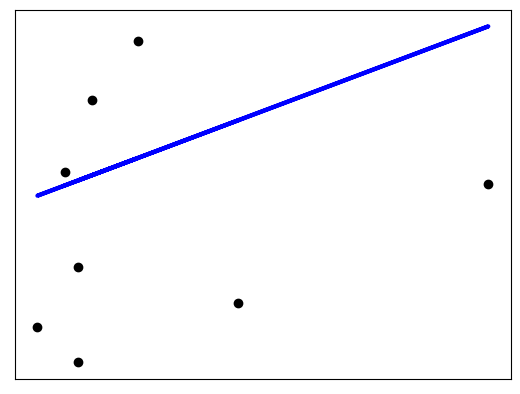

In [290]:

# revs_X = revs_X[:, np.newaxis, 2]

# Use only one feature

# Split the data into training/testing sets
revs_X_train = revs_X[:60]
revs_X_test = revs_X[60:68]
revs_X_test
# Split the targets into training/testing sets
revs_y_train = revs_y[:60]
revs_y_test = revs_y[60:68]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(revs_X_train, revs_y_train)

# Make predictions using the testing set
revs_y_pred = regr.predict(revs_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(revs_y_test, revs_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(revs_y_test, revs_y_pred))

# Plot outputs
plt.scatter(revs_X_test, revs_y_test, color="black")
plt.plot(revs_X_test, revs_y_pred, color="blue", linewidth=3)
# plt.xlim((-10, 30))                                                                                                            
# plt.ylim((230, 240))
plt.xticks(())
plt.yticks(())

plt.show()


##### *** Active power is useful power that does some real work in an AC circuit, whereas reactive power is non-useful power that flows back and forth

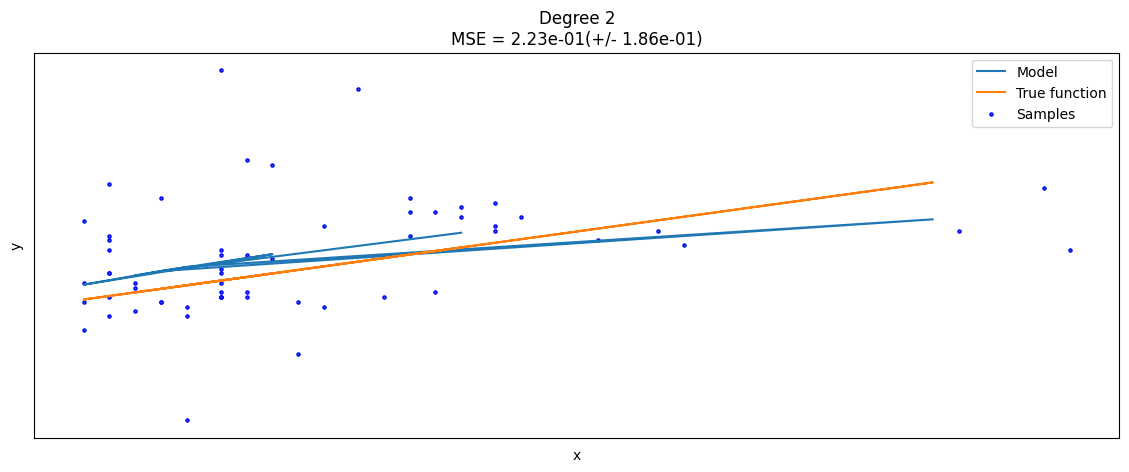

In [314]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return X -1

np.random.seed(0)

n_samples = 20
degrees = [2]

# X = np.sort(np.random.rand(n_samples))
# y = true_fun(revs_X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(revs_X_train, revs_y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, revs_X_train, revs_y_train, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(revs_X_test, pipeline.predict(revs_X_test), label="Model")
    plt.plot(revs_X_test, true_fun(revs_X_test), label="True function")
    plt.scatter(revs_X_train, revs_y_train, edgecolor="b", s=5, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    # plt.xlim((-10, 30))                                                                                                            
    # plt.ylim((230, 250))    
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )           
plt.show()

In [312]:

rand_cols = Travel_Reviews.sample(1)
rand_theater_col = rand_cols['museums'].to_list()
print(f'{rand_theater_col} \n {rand_cols}')



[1.44] 
       User ID  art_galleries  dance_clubs  juice_bars  restaurants  museums  \
483  User 484           0.58         2.96         1.9         0.53     1.44   

     resorts  parks_spots  beaches  theaters  religious_institutions  
483     2.24         3.19     3.18      2.18                     2.7  


In [313]:
print(linear_regression.predict(poly.fit_transform([rand_theater_col]))
)

[1.68212907]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(revs_X_train) 
X_poly

array([[ 1.    ,  2.24  ,  5.0176],
       [ 1.    ,  2.3   ,  5.29  ],
       [ 1.    ,  2.02  ,  4.0804],
       [ 1.    ,  2.02  ,  4.0804],
       [ 1.    ,  2.05  ,  4.2025],
       [ 1.    ,  2.18  ,  4.7524],
       [ 1.    ,  2.08  ,  4.3264],
       [ 1.    ,  2.05  ,  4.2025],
       [ 1.    ,  2.14  ,  4.5796],
       [ 1.    ,  3.04  ,  9.2416],
       [ 1.    ,  2.27  ,  5.1529],
       [ 1.    ,  2.24  ,  5.0176],
       [ 1.    ,  2.46  ,  6.0516],
       [ 1.    ,  2.5   ,  6.25  ],
       [ 1.    ,  2.14  ,  4.5796],
       [ 1.    ,  2.37  ,  5.6169],
       [ 1.    ,  2.21  ,  4.8841],
       [ 1.    ,  2.08  ,  4.3264],
       [ 1.    ,  2.21  ,  4.8841],
       [ 1.    ,  2.18  ,  4.7524],
       [ 1.    ,  2.18  ,  4.7524],
       [ 1.    ,  2.18  ,  4.7524],
       [ 1.    ,  2.18  ,  4.7524],
       [ 1.    ,  2.05  ,  4.2025],
       [ 1.    ,  2.11  ,  4.4521],
       [ 1.    ,  2.69  ,  7.2361],
       [ 1.    ,  2.5   ,  6.25  ],
       [ 1.    ,  2.4   ,  5

In [ ]:
polyreg = LinearRegression() 
polyreg.fit(X_poly, revs_y_train) 

LinearRegression()

In [ ]:
y_pred_pr = polyreg.predict(poly.fit_transform(revs_X_train))
from sklearn.metrics import r2_score
print('R2 score for Polynomial Regression:',r2_score(revs_y_train,y_pred_pr))

R2 score for Polynomial Regression: 0.11861133523173795


In [ ]:
Travel_Reviews.sample(1)

,User ID,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks_spots,beaches,theaters,religious_institutions
134,User 135,0.51,1.64,0.27,0.3,0.78,1.86,3.17,2.69,2.5,3.34


In [ ]:
polyreg.predict(poly.fit_transform([[2.5]]))

array([1.60871018])

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([0.5, 0.5])